# Importing the libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

# Load the data from excel into pandas

In [2]:
df = pd.read_excel('coefficient2.xlsx')
df

,Unnamed: 0,blood,skin,Fat,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,blood.1,skin.1,Fat.1,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Frequency(THz),refractive index,NaN,NaN,NaN,NaN,NaN,Frequency(THz),absorption coefficient(mm^-1),NaN,NaN,NaN,Path loss (blood) distance d=1mm,NaN,Path loss in dB
1,0.2,2.7108,2.487803,2.0305,NaN,NaN,NaN,0.2,11.7758,7.240005,4.0489,NaN,6.70806e+07,NaN,156.532
2,0.4,2.2105,2.246139,1.9319,NaN,NaN,NaN,0.4,16.0218,9.490481,5.8964,NaN,1.24583e+10,NaN,201.909
3,0.6,2.0427,2.165657,1.8659,NaN,NaN,NaN,0.6,18.6761,11.736955,8.0317,NaN,3.40264e+11,NaN,230.636
4,0.8,1.9573,2.111387,1.8101,NaN,NaN,NaN,0.8,20.9721,14.240531,10.0315,NaN,5.51746e+12,NaN,254.835
5,1,1.9013,2.065012,1.7649,NaN,NaN,NaN,1,23.1726,16.846053,11.7077,NaN,7.34532e+13,NaN,277.32
6,1.2,1.8588,2.023375,1.7295,NaN,NaN,NaN,1.2,25.3088,19.394905,13.0432,NaN,8.56007e+14,NaN,298.65
7,1.4,1.8239,1.986050,1.7021,NaN,NaN,NaN,1.4,27.3544,21.781510,14.0876,NaN,8675615827705397,NaN,318.766
8,1.6,1.794,1.952969,1.6809,NaN,NaN,NaN,1.6,29.2782,23.951465,14.8994,NaN,75062454482432384,NaN,337.508
9,1.8,1.7681,1.923947,1.6644,NaN,NaN,NaN,1.8,31.0583,25.887087,15.5355,NaN,547248001711980800,NaN,354.764


# Linear Regression Model

##### Model fitting and predict the value

In [3]:
freq = np.array(df.values[1:, 7], dtype='float').reshape(-1,1)
pa_lo = np.array(df.values[1:, 14], dtype='float')

model = LinearRegression().fit(freq, pa_lo)
y_prediction = model.predict(freq)
print(y_prediction)

[178.05588755 200.74160915 223.42733074 246.11305234 268.79877393
 291.48449553 314.17021712 336.85593872 359.54166031 382.22738191]


##### Measure the accuracy

In [4]:
r_sq = model.score(freq, pa_lo)
print("Variance(R^2) = ", r_sq)
print("Regression accuracy = {:0.2f}%".format(100 * r_sq))

Variance(R^2) =  0.979273503456954
Regression accuracy = 97.93%


##### Plotting the data

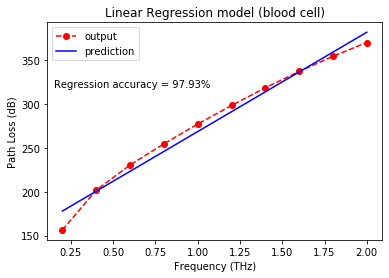

In [5]:
plt.plot(freq, pa_lo, 'ro--', label='output' )
plt.plot(freq, y_prediction, 'b-', label= "prediction")
plt.text(.15, 320, ("Regression accuracy = {:0.2f}%".format(100 * r_sq)))
plt.text(.15, 310, "distance = 1mm")
plt.xlabel('Frequency (THz)')
plt.ylabel('Path Loss (dB)')
plt.title('Linear Regression model (blood cell)')
plt.legend()
plt.savefig('1.png')

# Error testing of the prediction

##### Normal Equation  [theta = inverse(xTx)*xTy]

In [6]:
x_one = np.ones((10,1), dtype='float')
x = np.reshape(freq, (10,1))
updated_x = np.append(x_one, freq, axis=1)
x_trans = np.transpose(updated_x)
xT_dot_x = x_trans.dot(updated_x)
temp_1 = np.linalg.inv(xT_dot_x)
temp_2 = x_trans.dot(pa_lo)
theta = temp_1.dot(temp_2)
y_new_pred = (theta[0] + np.sum(theta[1]*freq, axis=1))
y_new_pred

array([178.05588755, 200.74160915, 223.42733074, 246.11305234,
       268.79877393, 291.48449553, 314.17021712, 336.85593872,
       359.54166031, 382.22738191])

##### Accuracy test

In [7]:
print("Regression accuracy = {:0.2f}%".format(100 * sm.r2_score(pa_lo, y_new_pred)))

Regression accuracy = 97.93%
